In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import tensorflow as tf
import cv2
import os

In [2]:
data_path = '/kaggle/input/myself'
image_list = []


for file_name in os.listdir(data_path):
  img = cv2.imread(os.path.join(data_path, file_name))
  image_list.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))

In [3]:
image_list = np.array(image_list)
print(image_list.shape)

(100, 150, 150, 3)


In [4]:
y = []

for i in range(len(image_list)):
  if i <= 80:
    y.append(1)
  else: 
    y.append(0)
y = np.array(y)
print(y.shape)

(100,)


In [5]:
X_train = []
X_test = []

for img in image_list[:70]:
  X_train.append(img)

for img in image_list[-10:]:
  X_train.append(img)

for img in image_list[70:90]:
  X_test.append(img)

X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(80, 150, 150, 3)
(20, 150, 150, 3)


In [6]:
y_train = []
y_test = []

for img in y[:70]:
  y_train.append(img)

for img in y[-10:]:
  y_train.append(img)

for img in y[70:90]:
  y_test.append(img)

y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape)
print(y_test.shape)

(80,)
(20,)


In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [8]:
from skimage import color

X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(80, 150, 150)
(20, 150, 150)


<function matplotlib.pyplot.show(close=None, block=None)>

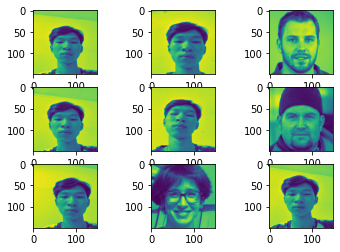

In [9]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [10]:
X_train = X_train.reshape(80, 22500)
X_test = X_test.reshape(20, 22500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 22500)
(20, 22500)
(80, 2)
(20, 2)


In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.5),
])

2022-05-16 15:33:12.259352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 15:33:12.371236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 15:33:12.372035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 15:33:12.373410: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(22500,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11520512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 40, verbose = 1, validation_data = (X_test, y_test))

2022-05-16 15:33:15.149940: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
2/2 [==============================] - 2s 194ms/step - loss: 42.7080 - accuracy: 0.8625 - val_loss: 18.6154 - val_accuracy: 0.5500
Epoch 2/40
2/2 [==============================] - 0s 23ms/step - loss: 9.8607 - accuracy: 0.7250 - val_loss: 42.4188 - val_accuracy: 0.5500
Epoch 3/40
2/2 [==============================] - 0s 24ms/step - loss: 10.5682 - accuracy: 0.8750 - val_loss: 1.2902 - val_accuracy: 0.5500
Epoch 4/40
2/2 [==============================] - 0s 26ms/step - loss: 2.2859 - accuracy: 0.7250 - val_loss: 19.5873 - val_accuracy: 0.5500
Epoch 5/40
2/2 [==============================] - 0s 27ms/step - loss: 4.7823 - accuracy: 0.8750 - val_loss: 1.8160 - val_accuracy: 0.5500
Epoch 6/40
2/2 [==============================] - 0s 27ms/step - loss: 1.0023 - accuracy: 0.8625 - val_loss: 4.9402 - val_accuracy: 0.5500
Epoch 7/40
2/2 [==============================] - 0s 25ms/step - loss: 1.6367 - accuracy: 0.8500 - val_loss: 3.4982 - val_accuracy: 0.5500
Epoch 8/40
2/2 [=====

In [16]:
score = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 19ms/step - loss: 0.7979 - accuracy: 0.5500


In [17]:
model.save('myself_ann.h5')

In [18]:
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  0.7978717684745789
Test accuracy =  0.550000011920929


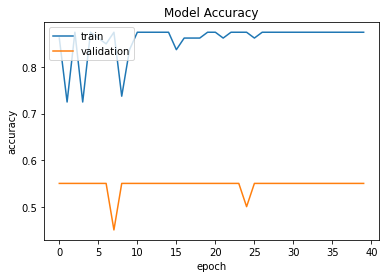

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [20]:
y_pred = model.predict(X_test)

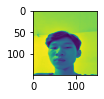

[0. 1.]


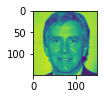

[0. 1.]


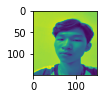

[0. 1.]


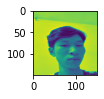

[0. 1.]


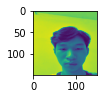

[0. 1.]


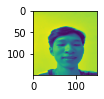

[0. 1.]


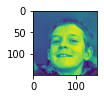

[0. 1.]


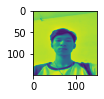

[0. 1.]


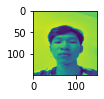

[0. 1.]


In [21]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i+10])
  plt.show()  
  print(np.round(y_pred[i+10]))

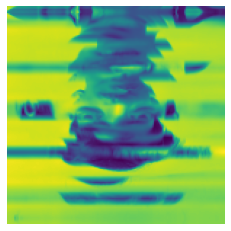

In [22]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])